In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Load the dataset
df = pd.read_csv("/content/Sales Records.csv")


In [ ]:
# Selecting numerical features and target
df = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Order Priority']]


In [ ]:
# Encoding categorical target variable
label_encoder = LabelEncoder()
df['Order Priority'] = label_encoder.fit_transform(df['Order Priority'])

In [ ]:
# Splitting data into training and testing sets
X = df.drop(columns=['Order Priority'])
y = df['Order Priority']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Predictions
y_pred = svm_model.predict(X_test)

In [ ]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.32      0.28      4924
           1       0.26      0.17      0.21      4967
           2       0.26      0.21      0.23      4998
           3       0.26      0.32      0.29      5111

    accuracy                           0.26     20000
   macro avg       0.26      0.26      0.25     20000
weighted avg       0.26      0.26      0.25     20000



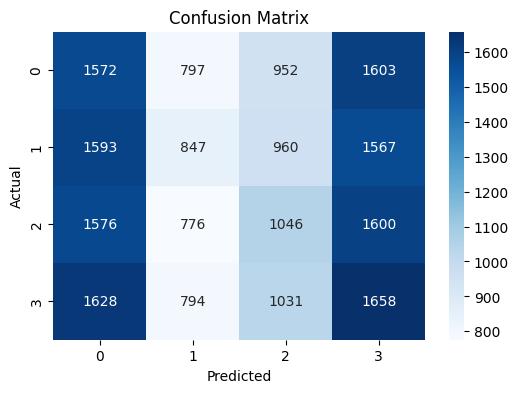

In [ ]:
# Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()